Nama: Yosephine Elisaujana Narwasthu

Nim: A11.2020.12685

In [ ]:
# Download Dataset

import requests
from io import BytesIO
from zipfile import ZipFile

dataset_url = "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
response = requests.get(dataset_url)
zip_file = ZipFile(BytesIO(response.content))
zip_file.extractall('/content')
zip_file.printdir()
zip_file.close()

File Name                                             Modified             Size
Index                                          2023-05-22 22:24:00          644
WARNING                                        2023-05-22 22:24:00          407
ask-detrano                                    2023-05-22 22:24:00          587
bak                                            2023-05-22 22:24:00         6737
cleve.mod                                      2023-05-22 22:24:00        23941
cleveland.data                                 2023-05-22 22:24:00        60669
costs/                                         2023-05-22 22:24:00            0
costs/Index                                    2023-05-22 22:24:00          250
costs/heart-disease.README                     2023-05-22 22:24:00         2558
costs/heart-disease.cost                       2023-05-22 22:24:00          185
costs/heart-disease.delay                      2023-05-22 22:24:00          234
costs/heart-disease.expense             

In [ ]:
import pandas as pd
import numpy as np

file_path = 'processed.cleveland.data'
df = pd.read_csv(file_path, header=None)

# Replacing '?' with NaN to identify missing values properly
df.replace('?', pd.NA, inplace=True)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      299 non-null    object 
 12  12      301 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# Mapping the relevant columns to their respective names as per the Variables Table
column_mapping = {
    0: 'age',        # Age
    1: 'sex',        # Sex
    2: 'cp',         # Chest pain type
    3: 'trestbps',   # Resting blood pressure
    4: 'chol',      # Serum cholestoral
    5: 'fbs',       # Fasting blood sugar
    6: 'restecg',   # Resting electrocardiographic results
    7: 'thalach',   # Maximum heart rate achieved
    8: 'exang',     # Exercise induced angina
    9: 'oldpeak',   # ST depression induced by exercise relative to rest
    10: 'slope',     # Slope of the peak exercise ST segment
    11: 'ca',        # Number of major vessels colored by flourosopy
    12: 'thal',      # Thalassemia
    13: 'num'        # Diagnosis of heart disease
}

selected_columns = list(column_mapping.keys())
df = df[selected_columns].copy()

# Renaming the columns
df.rename(columns=column_mapping, inplace=True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Check for Missing Values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Pemeriksaan Nilai yang Hilang
- Kolom 'ca' memiliki 4 nilai yang hilang.
- Kolom 'thal' memiliki 2 nilai yang hilang.
- Kolom lainnya tidak memiliki nilai yang hilang.

In [ ]:
# Handling missing values by imputing with the median for 'ca' and 'thal' columns
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].median())

# Confirm that missing values have been handled
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Data yang hilang sudah ditangani.

In [ ]:
# Mengubah tipe data ke float

df = df.astype(float)

In [ ]:
# Descriptive Statistics

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Statistik Deskriptif
1. **Umur (age)**: Rata-rata umur pasien adalah sekitar 54,44 tahun dengan standar deviasi 9,04 tahun. Umur termuda adalah 29 tahun dan tertua adalah 77 tahun.
2. **Jenis Kelamin (sex)**: Mayoritas pasien adalah laki-laki (nilai 1).
3. **Tipe Nyeri Dada (cp)**: Rata-rata tipe nyeri dada adalah sekitar 3,16.
4. **Tekanan Darah Istirahat (trestbps)**: Rata-rata tekanan darah saat istirahat adalah 131,69 mmHg.
5. **Kolesterol Serum (chol)**: Rata-rata kolesterol serum adalah 246,69 mg/dl.
6. **Gula Darah Puasa (fbs)**: Sebagian besar pasien memiliki gula darah puasa di bawah 120 mg/dl.
7. **Hasil EKG Istirahat (restecg)**: Rata-rata hasil EKG saat istirahat adalah sekitar 0,99.
8. **Detak Jantung Maksimum (thalach)**: Rata-rata detak jantung maksimum adalah 149,61 bpm.
9. **Angina yang Dipicu oleh Olahraga (exang)**: Sekitar 32,67% pasien mengalami angina yang dipicu oleh olahraga.
10. **Oldpeak**: Rata-rata oldpeak (depresi ST yang diinduksi oleh olahraga dibandingkan dengan istirahat) adalah 1,04.
11. **Slope**: Rata-rata nilai slope dari segmen ST puncak latihan adalah sekitar 1,60.
12. **Kapal Utama (ca)**: Rata-rata jumlah kapal utama yang terlihat dengan fluoroskopi adalah sekitar 0,67.
13. **Thal**: Rata-rata skor thal adalah sekitar 4,73.
14. **Diagnosis Penyakit Jantung (num)**: Rata-rata nilai diagnosis penyakit jantung adalah sekitar 0,94.

# Visualisasi Data

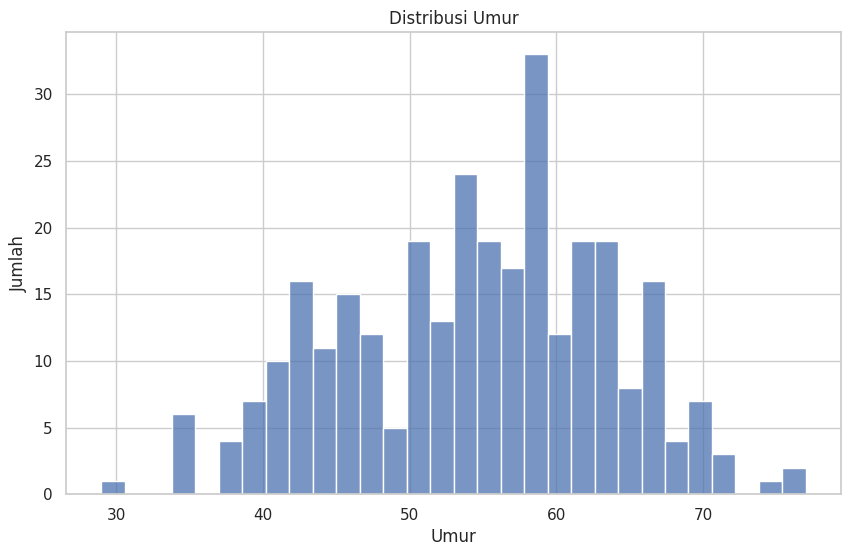

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-create the data visualizations with explanations

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=False, bins=30)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

**Distribusi Umur**: Histogram ini menunjukkan distribusi umur dari pasien dalam dataset. Dari histogram, kita dapat melihat bahwa sebagian besar pasien berada dalam kelompok umur 50-an dan 60-an, dengan frekuensi yang lebih rendah pada pasien yang lebih muda atau lebih tua.

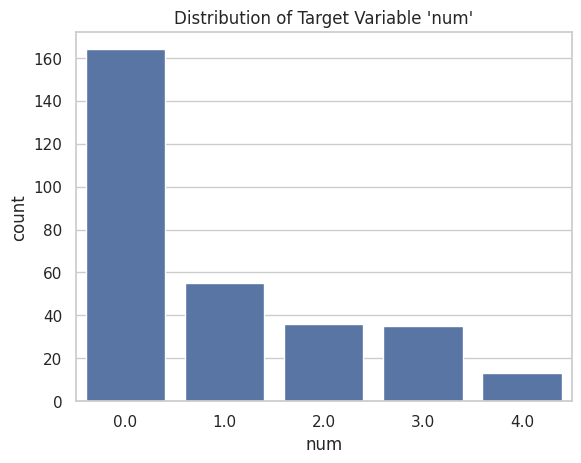

In [ ]:
# Visualisasi distribusi target
sns.countplot(x='num', data=df)
plt.title("Distribution of Target Variable 'num'")
plt.show()

Dari grafik distribusi target 'num', kita melihat bahwa distribusi kelas target tidak seimbang. Kelas dengan nilai '0' (tidak ada penyakit jantung) lebih dominan daripada kelas lainnya. Ini mengindikasikan bahwa mungkin perlu dilakukan penanganan khusus, seperti oversampling, untuk menghindari bias dalam pemodelan.

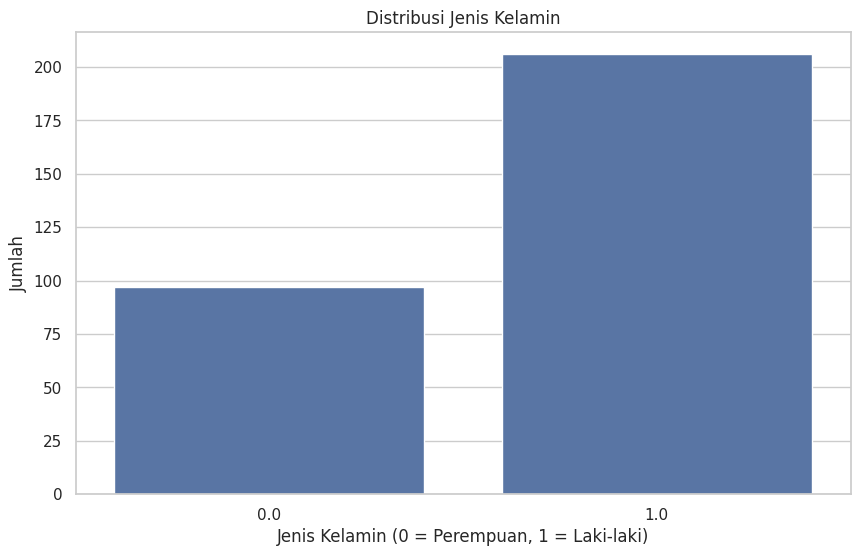

In [ ]:
# Bar plot for sex distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Jumlah')
plt.show()

**Distribusi Jenis Kelamin**: Diagram batang ini menunjukkan jumlah pasien laki-laki dan perempuan dalam dataset. Terlihat bahwa ada lebih banyak pasien laki-laki daripada perempuan.

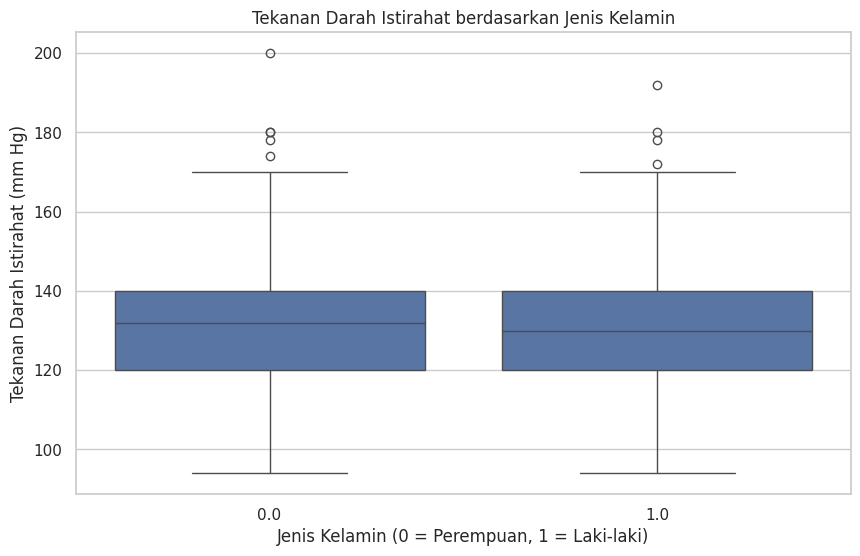

In [ ]:
# Boxplot for resting blood pressure
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='trestbps', data=df)
plt.title('Tekanan Darah Istirahat berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Tekanan Darah Istirahat (mm Hg)')
plt.show()

**Tekanan Darah Istirahat Berdasarkan Jenis Kelamin**: Boxplot ini menggambarkan distribusi tekanan darah istirahat (trestbps) antara laki-laki dan perempuan. Kita dapat melihat bahwa median tekanan darah istirahat cukup serupa antara kedua kelompin jenis kelamin, tetapi terdapat beberapa outlier, terutama pada pasien laki-laki.

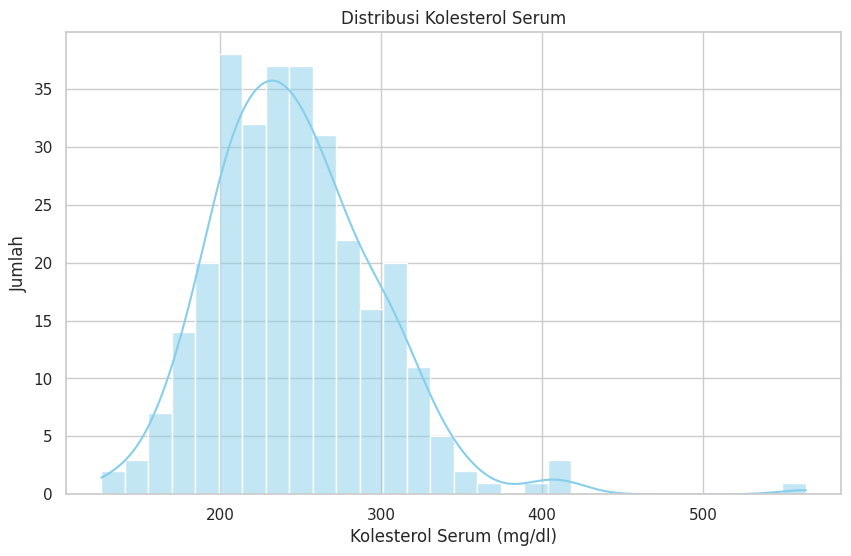

In [ ]:
# Distribution of cholesterol levels across patients
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Kolesterol Serum')
plt.xlabel('Kolesterol Serum (mg/dl)')
plt.ylabel('Jumlah')
plt.show()

**Distribusi Kolesterol Serum**: Histogram ini menunjukkan distribusi tingkat kolesterol serum di antara pasien. Kebanyakan pasien memiliki tingkat kolesterol serum yang berkisar antara 200 hingga 300 mg/dl.

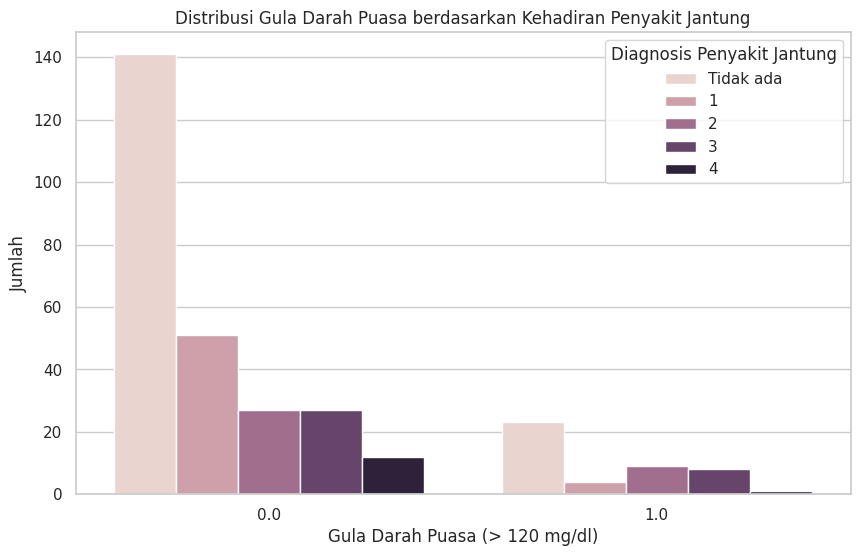

In [ ]:
# Distribution of fasting blood sugar by heart disease presence
plt.figure(figsize=(10, 6))
sns.countplot(x='fbs', hue='num', data=df)
plt.title('Distribusi Gula Darah Puasa berdasarkan Kehadiran Penyakit Jantung')
plt.xlabel('Gula Darah Puasa (> 120 mg/dl)')
plt.ylabel('Jumlah')
plt.legend(title='Diagnosis Penyakit Jantung', labels=['Tidak ada', '1', '2', '3', '4'])
plt.show()

**Distribusi Gula Darah Puasa Berdasarkan Kehadiran Penyakit Jantung**: Grafik ini menunjukkan distribusi pasien dengan gula darah puasa yang lebih tinggi dari 120 mg/dl dan hubungannya dengan diagnosis penyakit jantung. Pasien tanpa penyakit jantung (nilai 'num' 0) cenderung lebih banyak daripada yang memiliki penyakit jantung, terlepas dari tingkat gula darah puasa mereka.

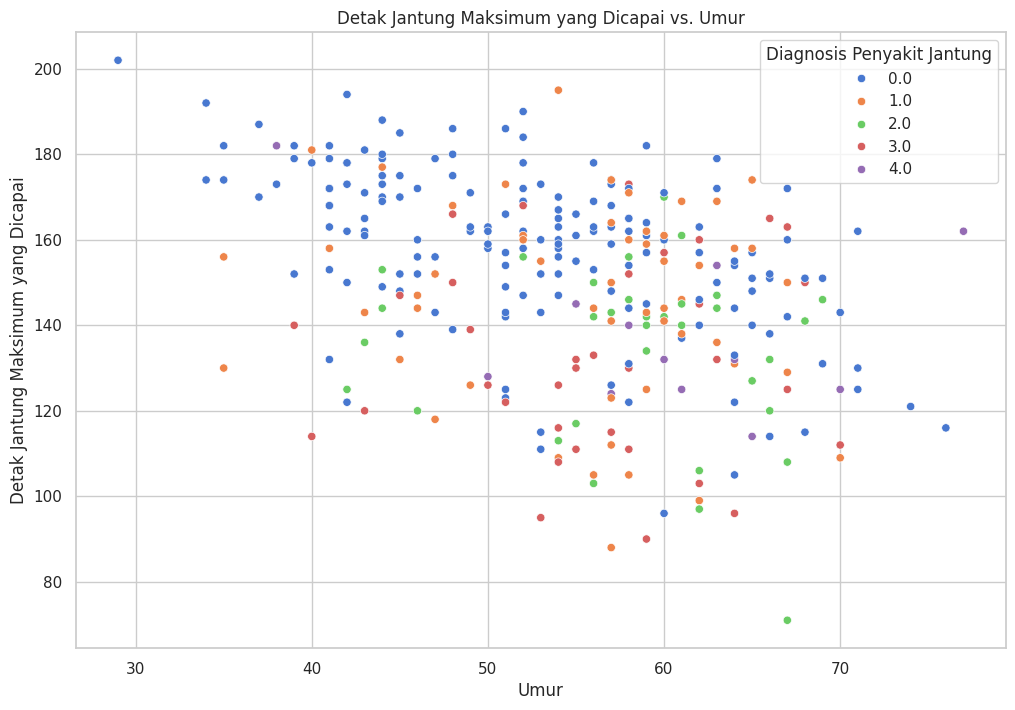

In [ ]:
# Scatter plot of maximum heart rate achieved vs. age with hue based on heart disease presence
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='thalach', hue='num', data=df, palette='muted')
plt.title('Detak Jantung Maksimum yang Dicapai vs. Umur')
plt.xlabel('Umur')
plt.ylabel('Detak Jantung Maksimum yang Dicapai')
plt.legend(title='Diagnosis Penyakit Jantung')
plt.show()

**Detak Jantung Maksimum yang Dicapai vs. Umur**: Plot sebar ini menggambarkan hubungan antara umur pasien dengan detak jantung maksimum yang dicapai selama tes stres, dengan pewarnaan berdasarkan diagnosis penyakit jantung. Pasien yang lebih muda cenderung mencapai detak jantung maksimum yang lebih tinggi, dan ada variasi yang signifikan pada detak jantung maksimum di antara pasien dengan diagnosis penyakit jantung yang berbeda.

<ipython-input-16-1c8396b4bace>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=df, palette='Set2')


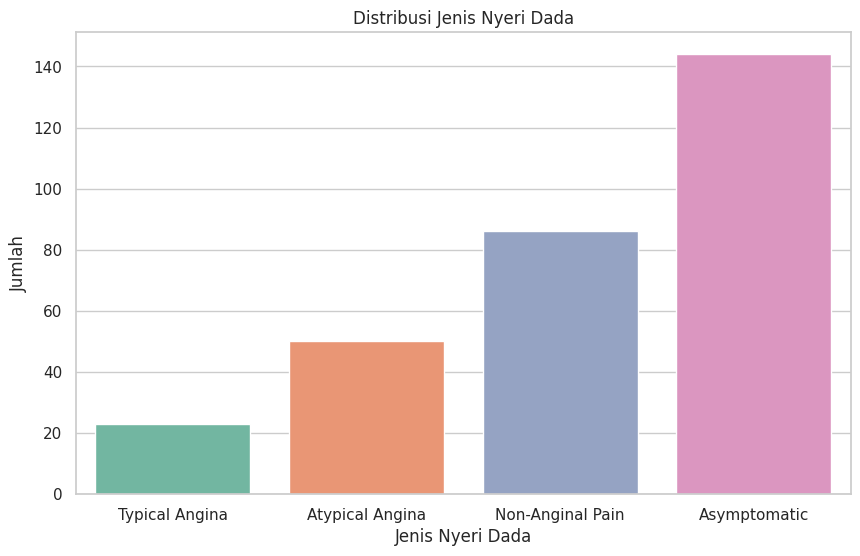

In [ ]:
# Distribution of chest pain types among patients
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=df, palette='Set2')
plt.title('Distribusi Jenis Nyeri Dada')
plt.xlabel('Jenis Nyeri Dada')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()

**Distribusi Jenis Nyeri Dada**: Grafik batang ini menunjukkan distribusi berbagai jenis nyeri dada di antara pasien. 'Typical Angina' adalah jenis yang paling umum, diikuti oleh 'Non-Anginal Pain', 'Atypical Angina', dan 'Asymptomatic'. Ini bisa memberikan wawasan tentang jenis nyeri dada yang paling sering dikaitkan dengan penyakit jantung dalam dataset ini.

<ipython-input-17-fd207200ba14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='restecg', data=df, palette='viridis')


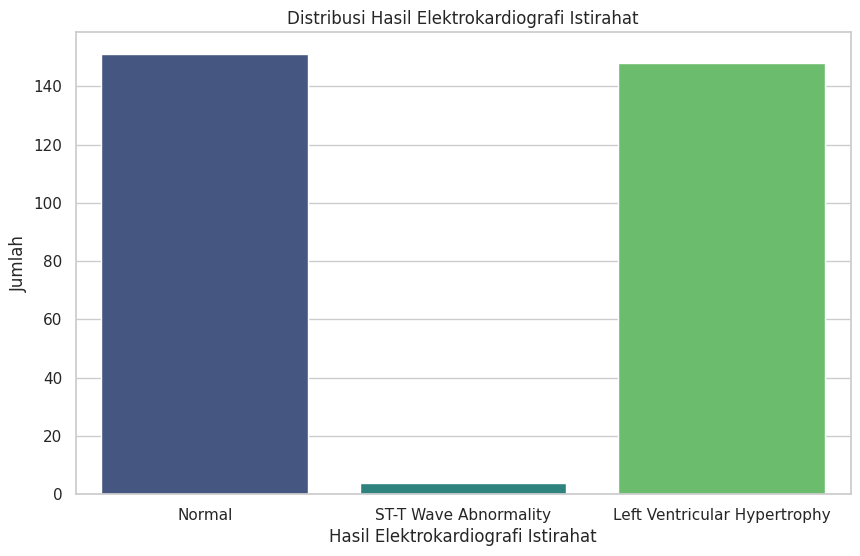

In [ ]:
# Distribution of resting electrocardiographic results
plt.figure(figsize=(10, 6))
sns.countplot(x='restecg', data=df, palette='viridis')
plt.title('Distribusi Hasil Elektrokardiografi Istirahat')
plt.xlabel('Hasil Elektrokardiografi Istirahat')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['Normal', 'ST-T Wave Abnormality', 'Left Ventricular Hypertrophy'])
plt.show()

**Distribusi Hasil Elektrokardiografi Istirahat (restecg)**: Visualisasi ini menunjukkan jumlah pasien dengan hasil elektrokardiografi istirahat normal, kelainan gelombang ST-T, dan hipertrofi ventrikel kiri. Sebagian besar pasien memiliki hasil elektrokardiografi normal, diikuti oleh jumlah yang lebih kecil dengan hipertrofi ventrikel kiri dan kelainan gelombang ST-T.

<ipython-input-18-fdbb7b422d5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='chol', data=df, palette='pastel')


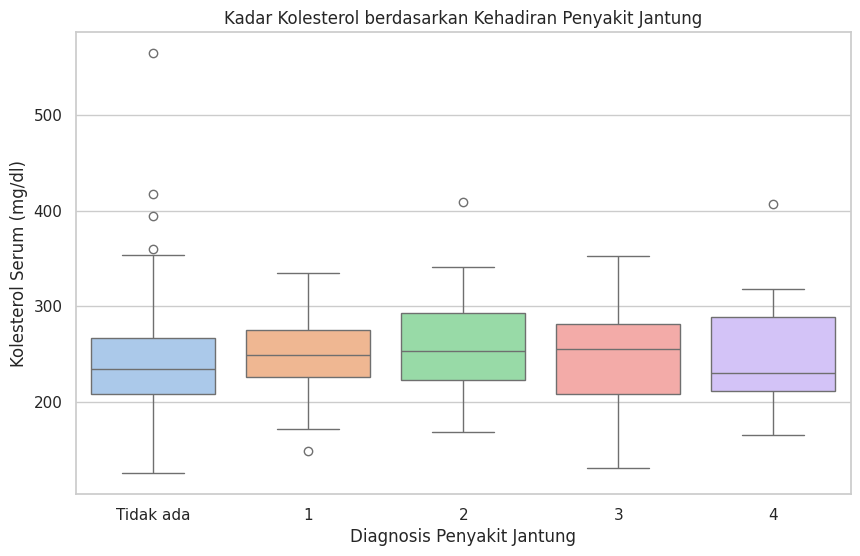

In [ ]:
# Boxplot of cholesterol levels by presence of heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='chol', data=df, palette='pastel')
plt.title('Kadar Kolesterol berdasarkan Kehadiran Penyakit Jantung')
plt.xlabel('Diagnosis Penyakit Jantung')
plt.ylabel('Kolesterol Serum (mg/dl)')
plt.xticks([0, 1, 2, 3, 4], ['Tidak ada', '1', '2', '3', '4'])
plt.show()

**Kadar Kolesterol berdasarkan Kehadiran Penyakit Jantung**: Boxplot ini menggambarkan distribusi kadar kolesterol serum di antara pasien dengan berbagai tingkat diagnosis penyakit jantung. Tingkat kadar kolesterol serum tampak serupa di antara pasien dengan atau tanpa penyakit jantung, meskipun beberapa pasien dengan penyakit jantung memiliki kadar kolesterol yang tinggi.

<ipython-input-19-f43e6975f1aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='oldpeak', data=df, palette='autumn')


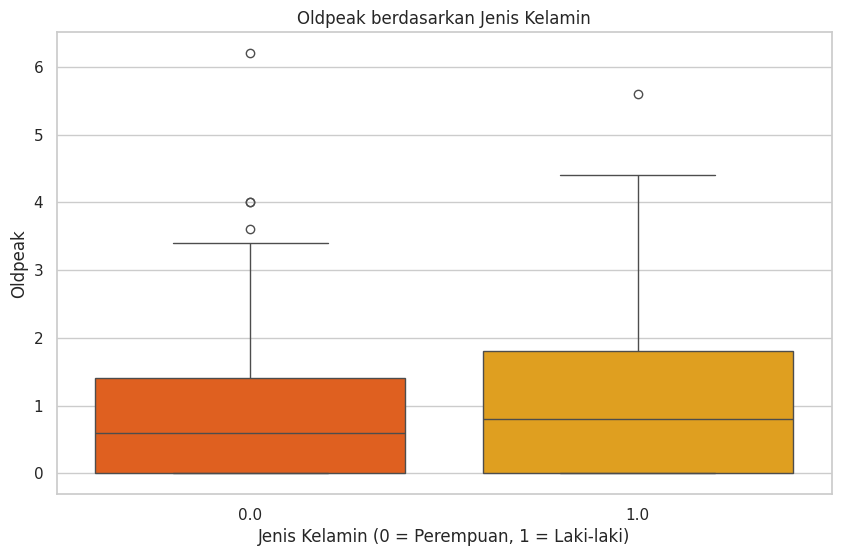

In [ ]:
# Boxplot of oldpeak by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='oldpeak', data=df, palette='autumn')
plt.title('Oldpeak berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Oldpeak')
plt.show()

**Oldpeak berdasarkan Jenis Kelamin**: Boxplot ini membandingkan distribusi nilai oldpeak, yang merupakan depresi segmen ST yang diinduksi oleh olahraga relatif terhadap istirahat, antara laki-laki dan perempuan. Terlihat bahwa terdapat variasi dalam oldpeak antara jenis kelamin, dengan beberapa outlier pada kedua kelompok.

<ipython-input-20-55241a6910fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exang', data=df, palette='winter')


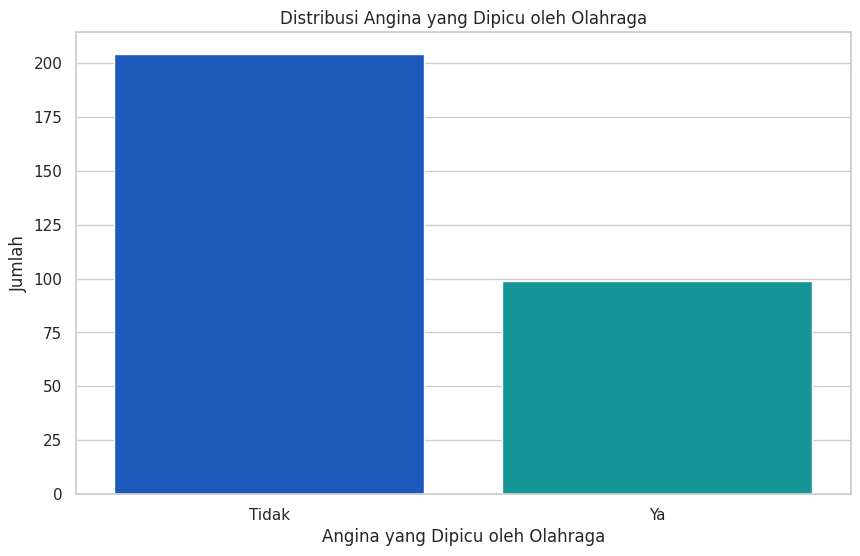

In [ ]:
# Distribution of exercise induced angina
plt.figure(figsize=(10, 6))
sns.countplot(x='exang', data=df, palette='winter')
plt.title('Distribusi Angina yang Dipicu oleh Olahraga')
plt.xlabel('Angina yang Dipicu oleh Olahraga')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

**Distribusi Angina yang Dipicu oleh Olahraga (exang)**: Diagram batang ini menampilkan jumlah pasien yang mengalami dan tidak mengalami angina yang dipicu oleh olahraga. Sejumlah besar pasien tidak mengalami angina selama aktivitas fisik, yang menunjukkan bahwa angina yang dipicu oleh olahraga tidak umum di antara pasien dalam dataset ini.

<ipython-input-21-7687afd9a309>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='slope', data=df, palette='cool')


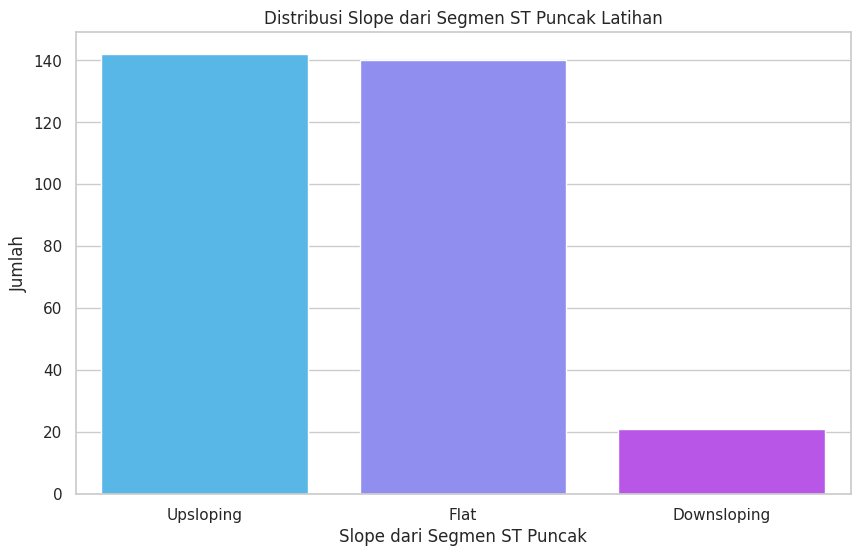

In [ ]:
# Slope of the peak exercise ST segment
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='cool')
plt.title('Distribusi Slope dari Segmen ST Puncak Latihan')
plt.xlabel('Slope dari Segmen ST Puncak')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
plt.show()

**Distribusi Slope dari Segmen ST Puncak Latihan**: Visualisasi ini menunjukkan distribusi dari 'slope', kemiringan segmen ST puncak saat latihan. Terlihat bahwa slope 'flat' merupakan yang paling umum di antara pasien, diikuti oleh 'upsloping' dan 'downsloping'. Slope ini mungkin berkaitan dengan hasil latihan jantung pasien dan dapat mengindikasikan kondisi tertentu yang berkaitan dengan penyakit jantung.

<ipython-input-22-35f42c159fa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ca', data=df, palette='coolwarm')


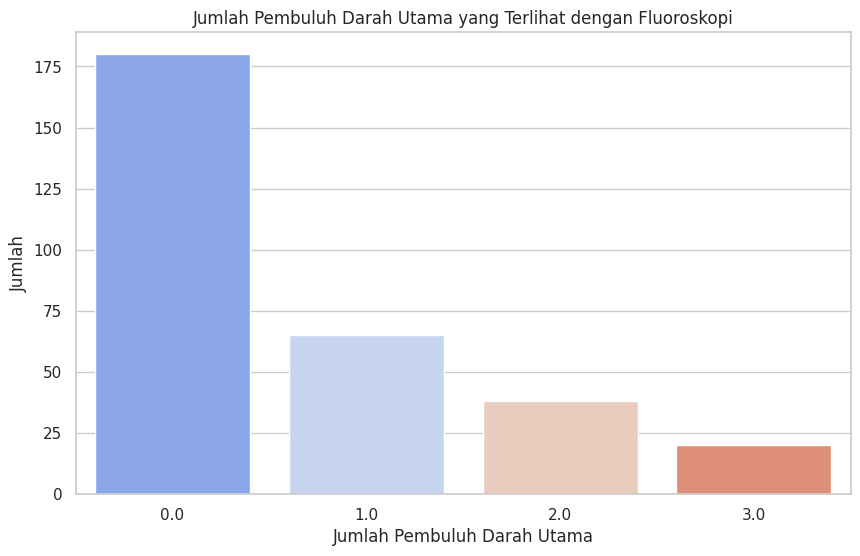

In [ ]:
# Number of major vessels colored by fluoroscopy
plt.figure(figsize=(10, 6))
sns.countplot(x='ca', data=df, palette='coolwarm')
plt.title('Jumlah Pembuluh Darah Utama yang Terlihat dengan Fluoroskopi')
plt.xlabel('Jumlah Pembuluh Darah Utama')
plt.ylabel('Jumlah')
plt.show()

**Jumlah Pembuluh Darah Utama yang Terlihat dengan Fluoroskopi**: Grafik ini menggambarkan jumlah pembuluh darah utama (ca) yang terlihat pada prosedur fluoroskopi. Kebanyakan pasien tidak menunjukkan adanya pembuluh darah utama yang terlihat, yang bisa merupakan tanda baik, sedangkan beberapa pasien memiliki satu atau lebih pembuluh darah yang terlihat.

<ipython-input-23-ff6f3c3e046b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='thal', data=df, palette='spring')


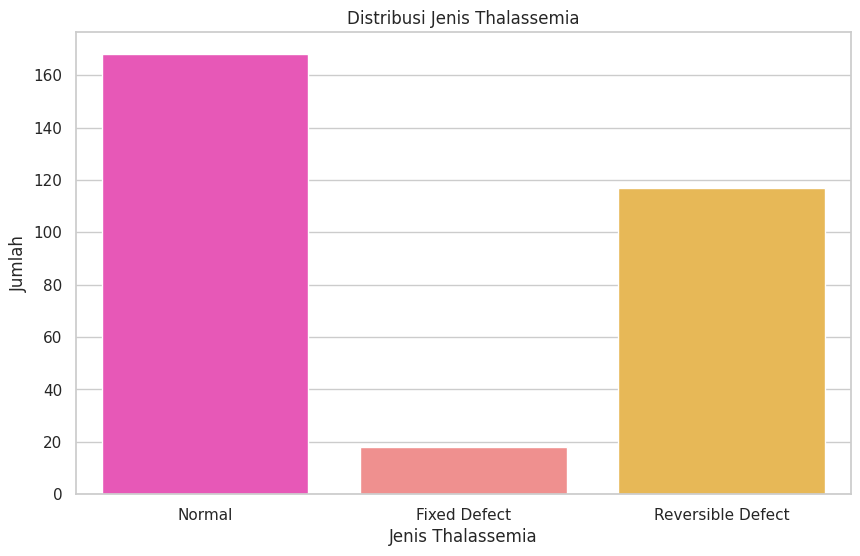

In [ ]:
# Thalassemia types among patients
plt.figure(figsize=(10, 6))
sns.countplot(x='thal', data=df, palette='spring')
plt.title('Distribusi Jenis Thalassemia')
plt.xlabel('Jenis Thalassemia')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['Normal', 'Fixed Defect', 'Reversible Defect'])
plt.show()

**Distribusi Jenis Thalassemia**: Diagram batang ini menampilkan distribusi dari jenis thalassemia yang terdeteksi pada pasien. Kategori 'Normal' adalah yang paling sedikit, sementara 'Fixed Defect' dan 'Reversible Defect' lebih umum. Jenis thalassemia ini bisa berkaitan dengan kondisi penyakit jantung yang berbeda dan sering digunakan sebagai penanda dalam diagnosis.


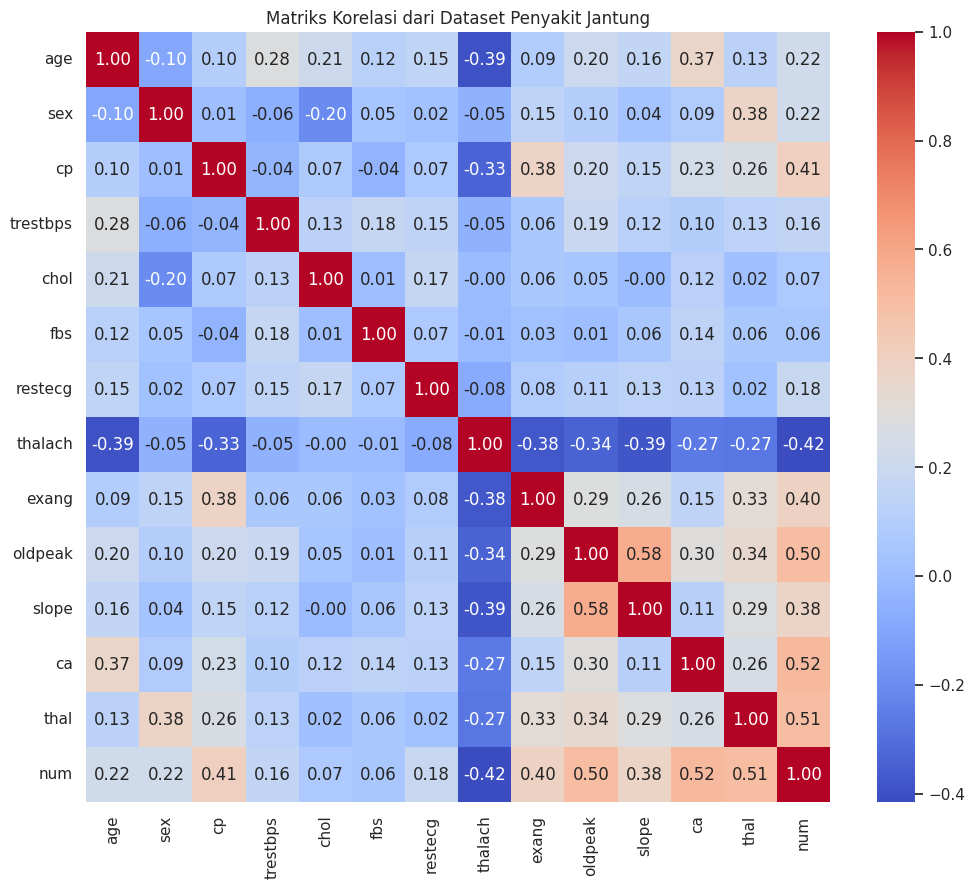

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.apply(pd.to_numeric, errors='coerce').corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi dari Dataset Penyakit Jantung')
plt.show()

**Matriks Korelasi dari Dataset Penyakit Jantung**: Heatmap ini menunjukkan korelasi antar variabel dalam dataset. Nilai korelasi positif tinggi (mendekati 1) menunjukkan bahwa ada hubungan linier positif antara dua variabel, sedangkan nilai korelasi negatif tinggi (mendekati -1) menunjukkan hubungan linier negatif. Misalnya, 'thalach' (detak jantung maksimum yang dicapai) memiliki korelasi negatif dengan 'age' (umur), yang berarti umumnya detak jantung maksimum menurun seiring bertambahnya umur. Variabel 'num' yang menunjukkan diagnosis penyakit jantung, memiliki korelasi positif dengan beberapa variabel seperti 'cp' (jenis nyeri dada) dan 'thal' (defek thalassemia), yang bisa mengindikasikan pentingnya variabel-variabel ini dalam diagnosis penyakit jantung.

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle

# The 'num' column is the target variable
X = df.drop('num', axis=1)  # Features
y = df['num']               # Target

# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Data dibersihkan dengan mengeluarkan kolom 'num' yang dianggap sebagai fitur (X), sementara kolom 'num' yang sama digunakan sebagai variabel target (y). Fitur data dinormalisasi menggunakan `StandardScaler` untuk menghasilkan skala yang seragam dengan rata-rata nol dan varians satu. Objek `StandardScaler` yang telah dilatih kemudian disimpan ke dalam file menggunakan modul `pickle`.

In [ ]:
# Apply SMOTE for dealing with class imbalance
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

y.value_counts()

0.0    164
2.0    164
1.0    164
3.0    164
4.0    164
Name: num, dtype: int64

Teknik `SMOTE` digunakan untuk menangani masalah ketidakseimbangan kelas dalam dataset. `SMOTE` menciptakan sampel data sintetis untuk kelas minoritas agar proporsi kelas dalam dataset menjadi seimbang. Setelah penerapan `SMOTE`, distribusi kelas target (y) menjadi seimbang, seperti yang ditunjukkan oleh fungsi `value_counts()`, dengan setiap kelas memiliki jumlah sampel yang sama, yaitu 164.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((656, 13), (164, 13), (656,), (164,))

Dataset dibagi menjadi dua set: set pelatihan dan set pengujian. Fungsi `train_test_split` digunakan dengan ukuran set pengujian sebesar 0.2 dari keseluruhan dataset dan pengaturan `random_state` untuk memastikan hasil yang dapat direplikasi. Hasilnya adalah empat array: `X_train` dan `X_test` untuk fitur, serta `y_train` dan `y_test` untuk variabel target. Dimensi dari masing-masing array ditunjukkan pada baris terakhir, yang mengindikasikan jumlah sampel dan fitur yang ada di setiap subset.

# Modelling

## 1. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the model on the oversampled training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71        28
         1.0       0.67      0.57      0.62        35
         2.0       0.66      0.77      0.71        35
         3.0       0.69      0.73      0.71        33
         4.0       0.80      1.00      0.89        33

    accuracy                           0.73       164
   macro avg       0.75      0.73      0.73       164
weighted avg       0.74      0.73      0.73       164



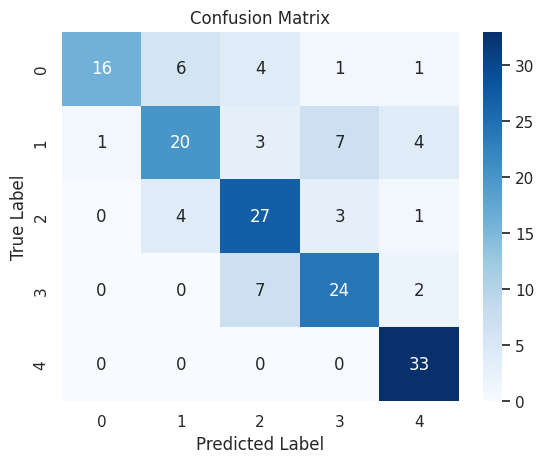

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Dari hasil prediksi menggunakan k-Nearest Neighbors (kNN) pada dataset penyakit jantung, model tersebut memiliki akurasi keseluruhan sebesar 73%. Performa model terbaik terlihat pada klasifikasi pasien tanpa penyakit jantung (label '0') dan pasien dengan kondisi paling serius (label '4'), dengan presisi dan recall yang tinggi, menunjukkan keakuratan dan kelengkapan yang baik dalam prediksi. Namun, ada beberapa kesalahan klasifikasi, terutama di antara kategori penyakit jantung dengan tingkat keparahan yang berbeda, yang dapat dilihat pada nilai-nilai non-diagonal dalam confusion matrix. Model ini paling akurat dalam mendeteksi pasien tanpa penyakit jantung dan mereka dengan kondisi serius, tetapi mengalami beberapa kesulitan dalam membedakan antara kelas-kelas penyakit jantung dengan tingkat keparahan yang berbeda.

## 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75        28
         1.0       0.42      0.37      0.39        35
         2.0       0.47      0.40      0.43        35
         3.0       0.45      0.45      0.45        33
         4.0       0.62      0.70      0.66        33

    accuracy                           0.54       164
   macro avg       0.53      0.55      0.54       164
weighted avg       0.52      0.54      0.53       164



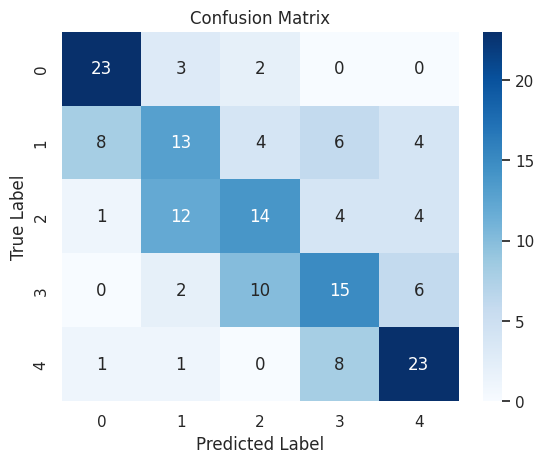

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model regresi logistik menunjukkan akurasi 54%, yang lebih rendah dibandingkan dengan model k-NN sebelumnya. Tingkat presisi dan recall bervariasi antar kelas, dengan kelas '0' (tidak ada penyakit jantung) memiliki kinerja yang lebih baik dibandingkan dengan kelas lainnya. F1-score tertinggi tercapai untuk kelas '0' dan '4', yang menunjukkan keakuratan dan keselarasan yang lebih baik antara presisi dan recall untuk kasus tanpa penyakit dan kasus paling parah. Confusion matrix menunjukkan model cenderung mengalami kesulitan membedakan antara beberapa kelas penyakit, khususnya pada kelas menengah (1, 2, dan 3), yang tercermin dari banyaknya nilai di luar diagonal utama.

## 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Save Model
pickle.dump(rf, open('rf.pkl', 'wb'))

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.86        28
         1.0       0.79      0.77      0.78        35
         2.0       0.78      0.83      0.81        35
         3.0       0.86      0.91      0.88        33
         4.0       0.94      1.00      0.97        33

    accuracy                           0.86       164
   macro avg       0.87      0.86      0.86       164
weighted avg       0.86      0.86      0.86       164



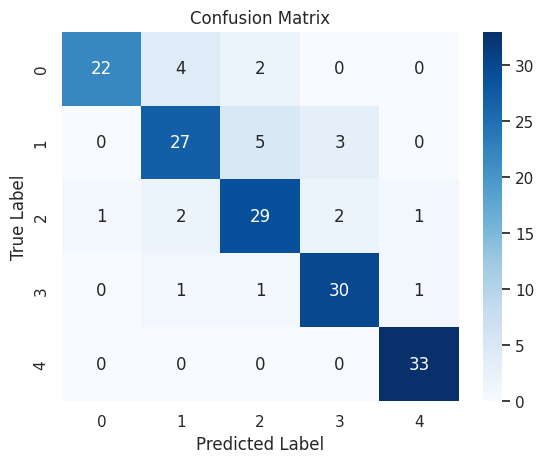

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Untuk model Random Forest, kinerja secara keseluruhan menunjukkan peningkatan yang signifikan dengan akurasi 85%. Model ini mencapai presisi dan recall yang tinggi di semua kelas, terutama pada kelas '4' yang menunjukkan presisi dan recall di atas 90%. F1-skor yang tinggi melintasi kelas menandakan keseimbangan yang kuat antara presisi dan recall, dengan nilai dukungan menunjukkan jumlah kasus yang seimbang di setiap kelas. Confusion matrix menunjukkan kecenderungan yang lebih rendah untuk kesalahan klasifikasi, dengan mayoritas prediksi yang benar terkonsentrasi di sepanjang diagonal utama.

# Kesimpulan

Dalam perbandingan ketiga model tersebut, Random Forest unggul dengan akurasi dan skor F1 yang secara signifikan lebih tinggi dibandingkan dengan k-NN dan regresi logistik. Model ini menunjukkan keandalan yang lebih konsisten dalam klasifikasi multi-kelas pada dataset penyakit jantung. K-NN memiliki akurasi yang moderat tetapi menderita beberapa kesalahan klasifikasi, sementara regresi logistik tampil paling buruk dengan akurasi dan F1-skor yang lebih rendah. Random Forest tidak hanya meningkatkan akurasi tetapi juga mengurangi jumlah kesalahan klasifikasi secara signifikan, menjadikannya model pilihan untuk dataset ini berdasarkan hasil yang disediakan.